<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>
 <br>
بهار 1402<br>

<font color=3C99D size=5>
امتحان میانترم<br>

تشخیص موضوع خبر
<br>
400 نمره
    
    
____


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
در این سوال قرار است تا مدلی برای تشخیص دسته بندی یک خبر ایجاد کنیم.
</div>

# Libraries

In [1]:
!pip install beautifulsoup4

In [41]:
from bs4 import BeautifulSoup
import re
from hazm import Normalizer
from hazm import word_tokenize
import numpy as np

import sklearn 
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
#import what you need

# Load data

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">.داده ها را در فرمت مناسب زبان فارسی بخوانید
در ادامه با یک نمونه 2000 تایی از داده ها کار کنید تا فرآیند ها طول نکشند
</div>

In [42]:
#TODO
import pandas as pd
data = pd.read_csv('/Users/dinasaur/Documents/ML/ml_mid_term/tasnim.csv', encoding='utf-8')
sample_data = data.sample(n=2000, random_state=42)
with open('/Users/dinasaur/Documents/ML/ml_mid_term/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = [line.strip() for line in f]
sample_data.head()

,category,title,abstract,body,time
45731,اقتصادی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی (فدرال رزرو) آمریکا...,به گزارش به نقل از راشاتودی، رؤسای منطقه‌ای ...,۰۶ مهر ۱۴۰۰ - ۱۲:۲۰
52281,بین الملل,خطیب زاده: برخی طرف‌های خارجی در صدد دامن زدن...,سخنگوی وزارت امور خارجه کشورمان با تأکید بر ا...,به گزارش گروه بین‌الملل ، سعید خطیب زاده سخنگ...,۱۶ دی ۱۴۰۰ - ۲۲:۵۴
1791,سیاسی,ولایتی: حاج قاسم مهم‌ترین سرداری بود که پرچم ...,مشاور مقام معظم رهبری در امور بین‌الملل گفت: ...,به گزارش گروه سیاسی ، علی‌اکبر ولایتی مشاور م...,۱۴ دی ۱۴۰۰ - ۱۵:۳۲
56668,رسانه ها,زمین سوخته,عصر کنونی را باید «عصر کرونا» نامید. اگر تا ق...,، علی دارابی طی یادداشتی در روزنامه صبح نو نوش...,۱۴ ارديبهشت ۱۳۹۹ - ۰۹:۴۸
28373,فرهنگی هنری,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,بخشی از نویسندگان ما تحت تأثیر ادبیات جنگ در ...,به گزارش خبرنگار فرهنگی ، رهبر انقلاب به مناس...,۰۴ خرداد ۱۴۰۰ - ۰۹:۰۶


# A. Exploratory Analysis (50 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
داده ها را از لحاظ پراکندگی بر اساس دسته بندی و طول متن ها بررسی کنید.
</div>

In [43]:
#TODO
sample_data['body'] = sample_data['body'].astype(str)
sample_data['text_length'] = sample_data['body'].apply(len)
text_length_dispersion = sample_data['text_length'].describe()
text_length_dispersion

count     2000.000000
mean      2670.646500
std       3138.317197
min          1.000000
25%        938.250000
50%       1669.500000
75%       3288.500000
max      30816.000000
Name: text_length, dtype: float64

# B. Text Cleaning (100 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
ستون های متنی مورد نظر خود را پاک سازی و آماده ساخت مدل کنید:
برای این کار می توانید از normalizer کتابخانه hazm استفاده کنید.

همچنین نشانه گذاری های متن ها را حذف کنید.

گاهی متن ها شامل عبارات کد شده مثل html هستند که نیاز است از متن حذف شوند .برای این کار از کتابخانه BeautifulSoup استفاده کنید.


حال نیاز است تا [واژه های پالایشی](https://fa.wikipedia.org/wiki/%D9%88%D8%A7%DA%98%D9%87_%D9%BE%D8%A7%D9%84%D8%A7%DB%8C%D8%B4%DB%8C_(%D9%BE%D8%B1%D8%AF%D8%A7%D8%B2%D8%B4_%D8%B2%D8%A8%D8%A7%D9%86_%D8%B7%D8%A8%DB%8C%D8%B9%DB%8C))
(stop words) 
را به همراه بعضی علامت ها از متن ها حذف کنیم.
برای حذف علائم می توانید از کتابخانه string  استفاده کنید.

 می توانید فهرست کلمات پالایشی انگلیسی 
 ( با استفاده از  کتابخانه NLTK) 
 همراه با 
  فهرست کلمات پالایشی زبان فارسی  که در پوشه تمرین قراره داده شده است 
([منبع و اطلاعات بیشتر](https://github.com/ziaa/Persian-stopwords-collection))
 استفاده کنید.
 
اگر از چند ستون متن برای آموزش مدل خود استفاده می کنید می توانید آن ها را به هم الحاق کنید و در یک ستون قرار دهید.
همچنین برای ستون هدف متغیر مناسب را جهت آموزش ایجاد کنید.
</div>

In [44]:
#TODO
from nltk.corpus import stopwords
import string

normalizer = Normalizer()
# Clean text columns + merge them into one
sample_data['merged_text'] = sample_data[['title', 'abstract', 'body']].apply(lambda x: ' '.join(x), axis=1)
# text normalization
sample_data['merged_text'] = sample_data['merged_text'].apply(normalizer.normalize)
# Remove HTML 
sample_data['merged_text'] = sample_data['merged_text'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())
# Remove punctuation marks and symbols
sample_data['merged_text'] = sample_data['merged_text'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))

#Remove stopwords
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords_fa = [line.strip() for line in f.readlines()]
stopwords_en = set(stopwords.words('english'))
sample_data['merged_text'] = sample_data['merged_text'].apply(lambda text: ' '.join(word for word in text.split() if word not in stopwords_fa and word not in stopwords_en))


X = sample_data['merged_text'] 
y = sample_data['category']  
sample_data.head()


/var/folders/cl/tkj6c1cd69q_9x9j76lm6sf00000gn/T/ipykernel_16723/3048042463.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sample_data['merged_text'] = sample_data['merged_text'].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())


,category,title,abstract,body,time,text_length,merged_text
45731,اقتصادی,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا در پ...,رؤسای منطقه‌ای بانک مرکزی (فدرال رزرو) آمریکا...,به گزارش به نقل از راشاتودی، رؤسای منطقه‌ای ...,۰۶ مهر ۱۴۰۰ - ۱۲:۲۰,1763,استعفای رؤسای منطقه‌ای بانک مرکزی آمریکا معامل...
52281,بین الملل,خطیب زاده: برخی طرف‌های خارجی در صدد دامن زدن...,سخنگوی وزارت امور خارجه کشورمان با تأکید بر ا...,به گزارش گروه بین‌الملل ، سعید خطیب زاده سخنگ...,۱۶ دی ۱۴۰۰ - ۲۲:۵۴,664,خطیب زاده طرف‌های خارجی صدد دامن ناآرامی‌ها قز...
1791,سیاسی,ولایتی: حاج قاسم مهم‌ترین سرداری بود که پرچم ...,مشاور مقام معظم رهبری در امور بین‌الملل گفت: ...,به گزارش گروه سیاسی ، علی‌اکبر ولایتی مشاور م...,۱۴ دی ۱۴۰۰ - ۱۵:۳۲,2429,ولایتی حاج قاسم مهم‌ترین سرداری پرچم احیای اسل...
56668,رسانه ها,زمین سوخته,عصر کنونی را باید «عصر کرونا» نامید. اگر تا ق...,، علی دارابی طی یادداشتی در روزنامه صبح نو نوش...,۱۴ ارديبهشت ۱۳۹۹ - ۰۹:۴۸,3491,زمین سوخته عصر «عصر کرونا» نامید شیوع ویروس جه...
28373,فرهنگی هنری,روایت سنگری از تأثیر منفی یک کتاب اروپایی بر ...,بخشی از نویسندگان ما تحت تأثیر ادبیات جنگ در ...,به گزارش خبرنگار فرهنگی ، رهبر انقلاب به مناس...,۰۴ خرداد ۱۴۰۰ - ۰۹:۰۶,2619,روایت سنگری تأثیر منفی کتاب اروپایی نویسندگان ...


# C. Word Cloud (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای 1000 متن اول دسته سیاسی ابر کلمات را رسم کنید تا کلمات مهم آن مشخص شوند.

In [6]:
#words are shown reversed
!pip install arabic-reshaper
!pip install python-bidi
!pip install wordcloud-fa==0.1.2

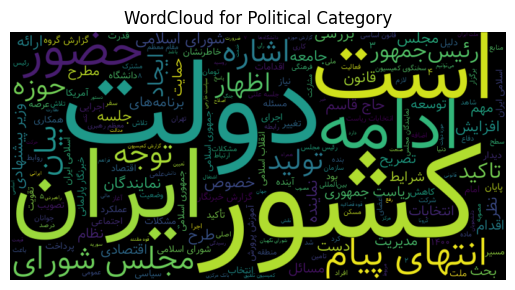

In [45]:
#TODO
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import arabic_reshaper
from wordcloud_fa import WordCloudFa

political_data = sample_data[sample_data['category'] == 'سیاسی']['merged_text'][:1000]
combined_text = ' '.join(political_data)
reshaped_text = arabic_reshaper.reshape(combined_text)
displayed_text = get_display(reshaped_text)
wordcloud = WordCloudFa(width=800, height=400, background_color='black').generate(displayed_text)

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Political Category')
plt.show()


# D. Vectorization (30 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
برای استفاده از جملات برای یادگیری ماشین نیاز است تا آن ها را به شکل برداری تبدیل کنیم.برای این کار روش های مختلفی وجود دارد.


 ما در اینجا از روش  [فراوانی وزنی تی‌اف-آی‌دی‌اف](https://fa.wikipedia.org/wiki/%D9%81%D8%B1%D8%A7%D9%88%D8%A7%D9%86%DB%8C_%D9%88%D8%B2%D9%86%DB%8C_%D8%AA%DB%8C%E2%80%8C%D8%A7%D9%81-%D8%A2%DB%8C%E2%80%8C%D8%AF%DB%8C%E2%80%8C%D8%A7%D9%81)
  استفاده می کنیم.برای اینکار می توانید از [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) کتابخانه sklearn استفاده کنید.
  همچنین به روش CountVectorizer نیز این کار را انجام دهید
  
  برای دریافت اسم فیچر ها می توانید از دستور get_feature_names_out روی تبدیل کننده بردار استفاده کنید.

In [46]:
#convert the text data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
y = data['category']
#TODO
count_vectorizer = CountVectorizer()
body=data['body']
body = body.fillna('')
X = count_vectorizer.fit_transform(body )
feature_names = count_vectorizer.get_feature_names_out()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
tfidf_vectorizer = TfidfVectorizer()
body=data['body']
body = body.fillna('')
X = tfidf_vectorizer.fit_transform(body )
feature_names = tfidf_vectorizer.get_feature_names_out()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# E. Train and test split (10 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

متغیر های  پیشبینی 
(برای هر دو روش بردارسازی)
و هدف را ایجاد کرده و به شکل مناسب آن ها برای آموزش و تست جدا کنید.

In [7]:
#TODO
#done in previous

# F. Model Training (200 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
با استفاده از روش هایی که تا اینجا یاد گرفتید(SVM , Decision Tree, Random Forest, KNN,Logistic Regression) مدل خود را آموزش دهید و معیار های آن ها را با هم مقایسه کنید.
بهترین مدل و بهترین روش بردار سازی را مشخص کنید.

برای مدل KNN بهترین مقدار N و 

برای مدل Loggistic regression  بهترین مدل را به ازای پنالتی های مختلف(l1 یا l2)
و C با استفاده از gridsearchcv انتخاب کنید.

در تمام مدل ها از kfold با k=5 استفاده کنید و نمره میانگین را مد نظر قرار دهید.

در روش KNN به ازای N های مختلف نمودار میانگین accuarcy را رسم کنید

در نهایت یک نمودار رسم کنید که accuaracy تمام مدل ها به ازای داده ی تمرین و تست را برای هر دو روش بردارسازی مقایسه کند.
علت عملکرد هر روش و مدل را که به نظر شما معنادار است بررسی کنید.(تحلیل شما از علت برتری یا شکست یک روش بردارسازی و مدل یادگیری ماشین یکتا نیست.سعی کنید خودتان تحلیل کنید)

</div>

In [48]:
#TODO
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv('/Users/dinasaur/Documents/ML/ml_mid_term/tasnim.csv', encoding='utf-8')
data = data.sample(n=2000, random_state=42)
X = data['body'].fillna('')
y = data['category']
tfidf_vectorizer = TfidfVectorizer()
count_vectorizer = CountVectorizer()

vectorizers = {
    'TF-IDF': tfidf_vectorizer,
    'CountVectorizer': count_vectorizer
}
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

def perform_cross_validation(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    sc = cross_val_score(model, X, y, cv=kf)
    avg_score = np.mean(sc)
    return avg_score
scores = {}
train_test_accuracy = {}

In [49]:
model=SVC()
for vectorizer_name, vectorizer in vectorizers.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_transformed = vectorizer.fit_transform(X_train)
    model.fit(X_train_transformed, y_train)
    train_pred = model.predict(X_train_transformed)
    X_test_transformed = vectorizer.transform(X_test)
    test_pred = model.predict(X_test_transformed)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_test_accuracy[('SVM', vectorizer_name)] = (train_acc, test_acc)
    avg_score = perform_cross_validation(model, X_train_transformed, y_train)
    scores[('SVM', vectorizer_name)] = avg_score

In [50]:
model=DecisionTreeClassifier()
for vectorizer_name, vectorizer in vectorizers.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_transformed = vectorizer.fit_transform(X_train)
    model.fit(X_train_transformed, y_train)
    train_pred = model.predict(X_train_transformed)
    X_test_transformed = vectorizer.transform(X_test)
    test_pred = model.predict(X_test_transformed)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_test_accuracy[('Decision Tree', vectorizer_name)] = (train_acc, test_acc)
    avg_score = perform_cross_validation(model, X_train_transformed, y_train)
    scores[('Decision Tree', vectorizer_name)] = avg_score

In [51]:
model=RandomForestClassifier()
for vectorizer_name, vectorizer in vectorizers.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_transformed = vectorizer.fit_transform(X_train)
    model.fit(X_train_transformed, y_train)
    train_pred = model.predict(X_train_transformed)
    X_test_transformed = vectorizer.transform(X_test)
    test_pred = model.predict(X_test_transformed)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_test_accuracy[('Random Forest', vectorizer_name)] = (train_acc, test_acc)
    avg_score = perform_cross_validation(model, X_train_transformed, y_train)
    scores[('Random Forest', vectorizer_name)] = avg_score

In [52]:
model=KNeighborsClassifier()
for vectorizer_name, vectorizer in vectorizers.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_transformed = vectorizer.fit_transform(X_train)
    model.fit(X_train_transformed, y_train)
    train_pred = model.predict(X_train_transformed)
    X_test_transformed = vectorizer.transform(X_test)
    test_pred = model.predict(X_test_transformed)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_test_accuracy[('KNN', vectorizer_name)] = (train_acc, test_acc)
    avg_score = perform_cross_validation(model, X_train_transformed, y_train)
    scores[('KNN', vectorizer_name)] = avg_score

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_lr = [
    {
        'classifier__penalty': ['l1'],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs'],
        'classifier__C': [0.1, 1, 10]
    }
]

best_score = 0.0
best_vectorizer = None
best_model = None

for vectorizer_name, vectorizer in vectorizers.items():
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', LogisticRegression(max_iter=3000))
    ])
    
    X_train_transformed = vectorizer.fit_transform(X_train)
    
    grid_search = GridSearchCV(pipeline, param_grid_lr, cv=5)
    grid_search.fit(X_train_transformed, y_train)
    
    score = grid_search.best_score_
    params = grid_search.best_params_
    model = grid_search.best_estimator_
    
    if score > best_score:
        best_score = score
        best_vectorizer = vectorizer_name
        best_model = model

X_train_transformed = vectorizers[best_vectorizer].fit_transform(X_train)
best_model.fit(X_train_transformed, y_train)
train_pred = best_model.predict(X_train_transformed)
train_acc = accuracy_score(y_train, train_pred)

X_test_transformed = vectorizers[best_vectorizer].transform(X_test)
test_pred = best_model.predict(X_test_transformed)
test_acc = accuracy_score(y_test, test_pred)

train_test_accuracy[(best_model, best_vectorizer)] = (train_acc, test_acc)
avg_score = perform_cross_validation(best_model, X_train_transformed, y_train, cv=5)
scores[(best_model, best_vectorizer)] = avg_score


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 2133, in fit_transform
    X = super().fit_transform(raw_documents)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 1275, in _count_vocab
    for feature in analyze(doc):
                   ^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 111, in _analyze
    doc = preprocessor(doc)
          ^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 69, in _preprocess
    doc = doc.lower()
          ^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_base.py", line 771, in __getattr__
    raise AttributeError(attr + " not found")
AttributeError: lower not found


In [15]:
scores 

{('SVM', 'TF-IDF'): 0.7706250000000001,
 ('SVM', 'CountVectorizer'): 0.5525,
 ('Decision Tree', 'TF-IDF'): 0.6793750000000001,
 ('Decision Tree', 'CountVectorizer'): 0.69625,
 ('Random Forest', 'TF-IDF'): 0.78375,
 ('Random Forest', 'CountVectorizer'): 0.7899999999999999,
 ('KNN', 'TF-IDF'): 0.20750000000000002,
 ('KNN', 'CountVectorizer'): 0.538125,
 ('Logistic Regression', 'TF-IDF'): 0.774375,
 ('Logistic Regression', 'CountVectorizer'): 0.7568749999999999}

In [16]:
train_test_accuracy

{('SVM', 'TF-IDF'): (0.985625, 0.81),
 ('SVM', 'CountVectorizer'): (0.76375, 0.6175),
 ('Decision Tree', 'TF-IDF'): (0.990625, 0.7),
 ('Decision Tree', 'CountVectorizer'): (0.990625, 0.7275),
 ('Random Forest', 'TF-IDF'): (0.990625, 0.805),
 ('Random Forest', 'CountVectorizer'): (0.990625, 0.7875),
 ('KNN', 'TF-IDF'): (0.368125, 0.2425),
 ('KNN', 'CountVectorizer'): (0.745, 0.5475),
 ('Logistic Regression', 'TF-IDF'): (0.93, 0.8025),
 ('Logistic Regression', 'CountVectorizer'): (0.989375, 0.7825)}

In [17]:
# Train best model + vectorizer on training data
best_model, best_vectorizer = max(scores, key=scores.get)
best_score = scores[(best_model, best_vectorizer)]
best_model = models[best_model]
best_vectorizer = vectorizers[best_vectorizer]
X_train_transformed = best_vectorizer.fit_transform(X_train)
best_model.fit(X_train_transformed, y_train)
X_test_transformed = best_vectorizer.transform(X_test)
train_accuracy = best_model.score(X_train_transformed, y_train)
test_accuracy = best_model.score(X_test_transformed, y_test)

print("Best Model:", best_model)
print("Best Vectorizer:", best_vectorizer)
print("Best Score:", best_score)
print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Best Model: RandomForestClassifier()
Best Vectorizer: CountVectorizer()
Best Score: 0.7899999999999999
Training Accuracy: 0.990625
Test Accuracy: 0.7975


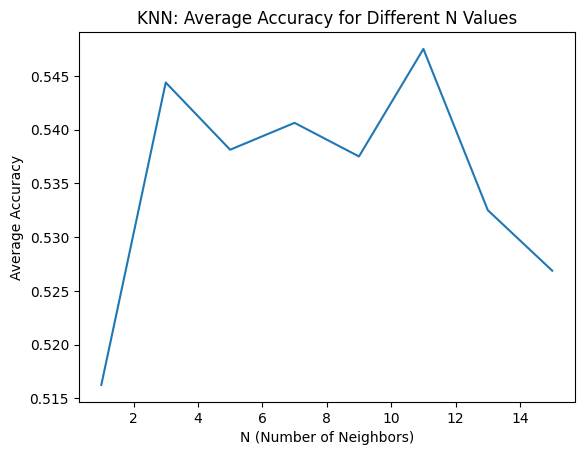

In [19]:
n_values = [1, 3, 5, 7, 9, 11, 13, 15]
knn_scores = []
for n in n_values:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_score = perform_cross_validation(knn_model, X_train_transformed, y_train)
    knn_scores.append(knn_score)
plt.plot(n_values, knn_scores)
plt.xlabel('N (Number of Neighbors)')
plt.ylabel('Average Accuracy')
plt.title('KNN: Average Accuracy for Different N Values')
plt.show()

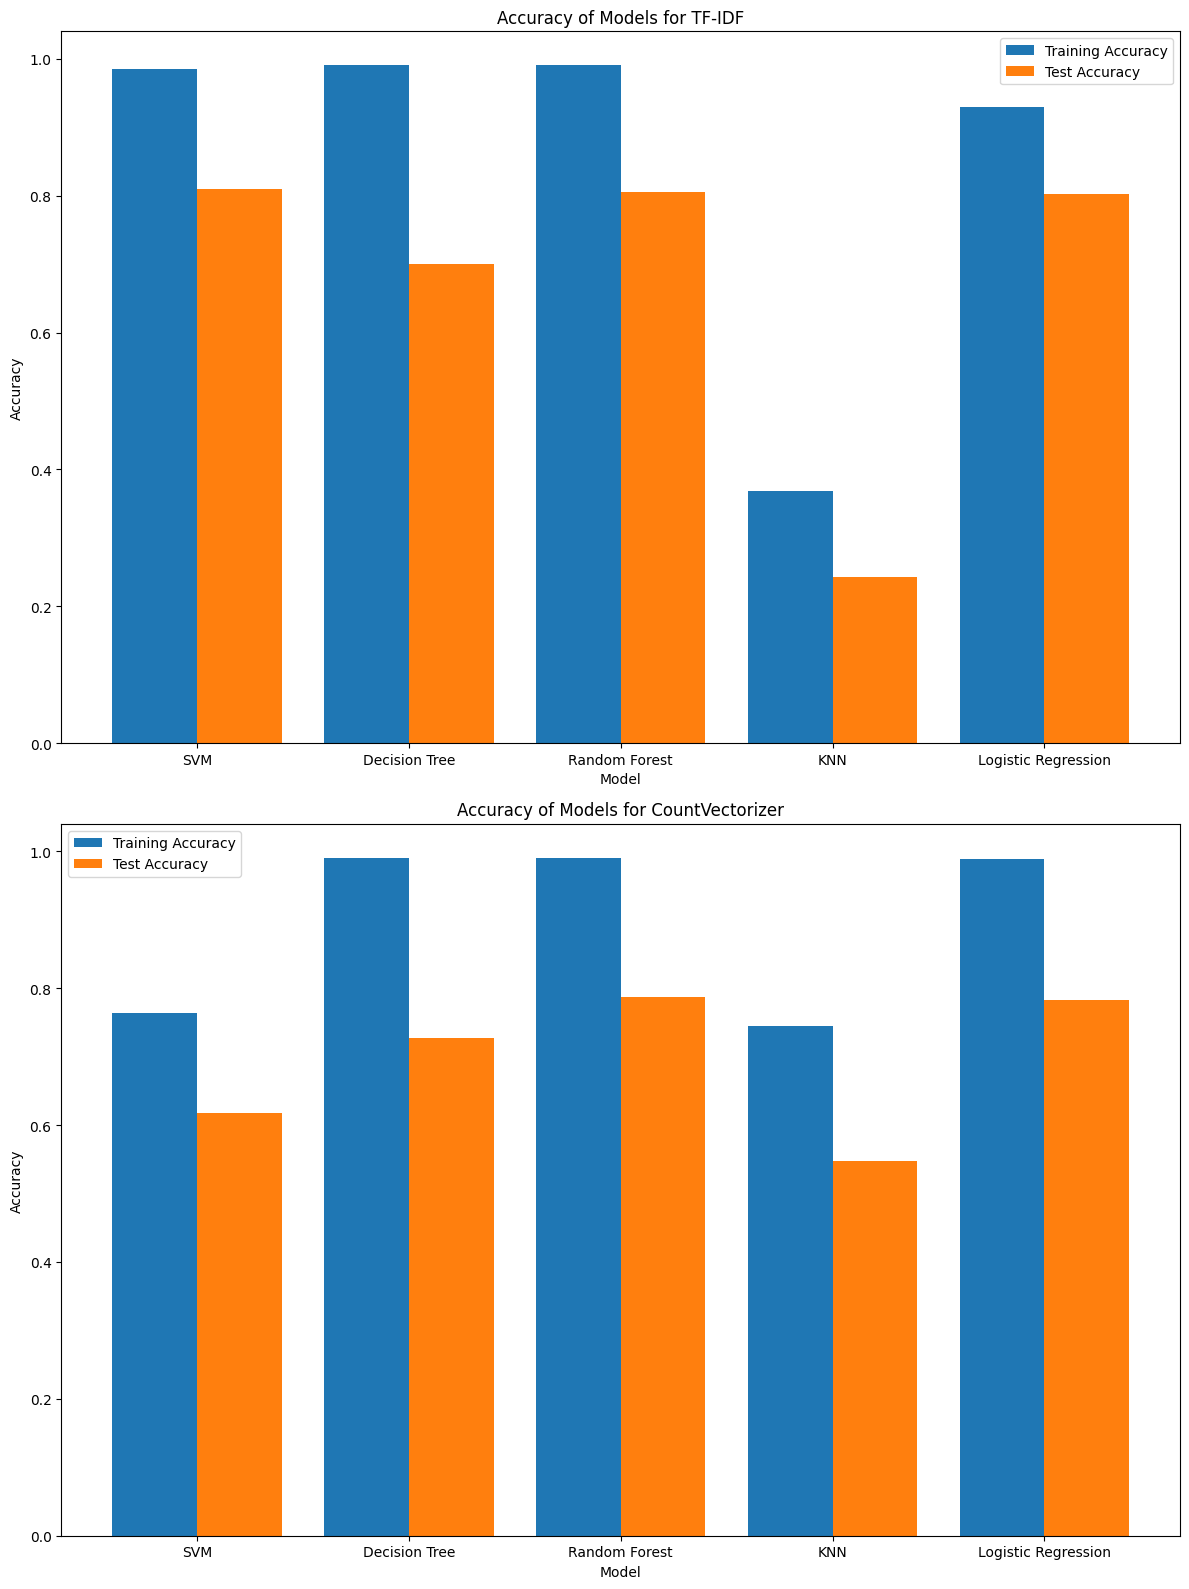

In [20]:
x = np.arange(len(models))
width = 0.4
fig, axs = plt.subplots(len(vectorizers), figsize=(12, 8 * len(vectorizers)))
for i, (vectorizer_name, vectorizer) in enumerate(vectorizers.items()):
    ax = axs[i]
    train_acc_values = [train_test_accuracy[(model_name, vectorizer_name)][0] for model_name in models.keys()]
    test_acc_values = [train_test_accuracy[(model_name, vectorizer_name)][1] for model_name in models.keys()]
    ax.bar(x - width / 2, train_acc_values, width, label='Training Accuracy')
    ax.bar(x + width / 2, test_acc_values, width, label='Test Accuracy')
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(models.keys())
    ax.set_title(f'Accuracy of Models for {vectorizer_name}')
    ax.legend()
plt.tight_layout()
plt.show()

RandomForestClassifier is considered the best model based on the dataset because it achieved the highest average accuracy score during the cross-validation process. 
This indicates that RandomForestClassifier was able to effectively learn and generalize patterns from the training data to make accurate predictions on unseen test data.
Random Forest is an ensemble learning method that combines multiple decision trees. It has several characteristics that make it well-suited for classification tasks:
1. Robustness to outliers: Random Forest is less sensitive to outliers compared to some other models like KNN or SVM. The ensemble of trees helps to mitigate the impact of outliers by considering multiple trees' predictions.
2. Non-linearity and complex interactions: Random Forest can capture non-linear relationships and complex interactions between features. It can identify important features and their interactions, which is particularly useful when dealing with high-dimensional data.
3. Reduction of overfitting: Random Forest applies randomization techniques, such as bootstrapping and feature sampling, which help to reduce overfitting. By averaging predictions from multiple trees, it improves generalization performance and minimizes the risk of overfitting to noisy or irrelevant features.
4. Handling of high-dimensional data: Random Forest can effectively handle high-dimensional data without the need for feature selection or dimensionality reduction techniques. It can automatically select informative features and ignore irrelevant ones during the tree-building process.

Based on these characteristics, RandomForestClassifier demonstrated strong performance on the given dataset, leading to its selection as the best model. However, it's important to note that the best model choice depends on the specific dataset and problem.